<a href="https://colab.research.google.com/github/EvgeniBondarev/Evhenos/blob/main/KyrochkaLeckciya4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
plt.figure(figsize = (9,5))
for i in range(27):
  plt.subplot(3,9,i+1)
  plt.imshow(x_train[i],cmap = "icefire")
  plt.axis("off")

In [ ]:
x_train = x_train.reshape([-1,784]) / 255.0
x_test = x_test.reshape([-1,784]) / 255.0

(x_train1,x_test1,y_train1,y_test1) = train_test_split(x_train,y_train,test_size = 0.25, random_state= 42)
(x_train1,x_val,y_train1,y_val) = train_test_split(x_train,y_train,test_size = 0.1, random_state= 84)

In [ ]:
print("Train size {0}".format(len(y_train1)))
print("Test size {0}".format(len(y_test1)))
print("Val size {0}".format(len(y_val)))

Train size 54000
Test size 15000
Val size 6000


#МЕТОД K-БЛИЖАЙШИХ СОСЕДЕЙ

In [ ]:
#МЕТОД БЛИЖАЙШИХ СОСЕДЕЙ
kVals = [1, 3,5,10,15]
accurat = []

for k in kVals:
  model = KNeighborsClassifier(n_neighbors= k)
  model.fit(x_train1,y_train1)
  score = model.score(x_val,y_val)
  print("K = {0} accurat = {1}".format(k, score))
  accurat.append(score)                                                    

K = 1 accurat = 0.9748333333333333
K = 3 accurat = 0.9761666666666666
K = 5 accurat = 0.9728333333333333
K = 10 accurat = 0.9706666666666667
K = 15 accurat = 0.966


In [ ]:
index = np.argmax(accurat)
print("k = {0} is the best. Achieved accuracy is {1}".format(kVals[index],accurat[index]))

k = 3 is the best. Achieved accuracy is 0.9761666666666666


In [ ]:
bestModel = KNeighborsClassifier(n_neighbors= kVals[index])
bestModel.fit(x_train1,y_train1)
y_prediction = bestModel.predict(x_test1)

print("Evaluation of model ")
print(classification_report(y_test1,y_prediction))

Evaluation of model 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1495
           1       0.98      1.00      0.99      1649
           2       0.99      0.98      0.98      1471
           3       0.99      0.98      0.98      1518
           4       0.99      0.98      0.99      1443
           5       0.98      0.98      0.98      1383
           6       0.99      1.00      0.99      1482
           7       0.98      0.99      0.98      1635
           8       0.99      0.97      0.98      1445
           9       0.98      0.98      0.98      1479

    accuracy                           0.99     15000
   macro avg       0.99      0.98      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
cm = confusion_matrix(y_true = y_test1,y_pred = y_prediction)
print(cm)

[[1486    0    0    0    0    2    5    0    0    2]
 [   0 1644    3    0    1    0    0    1    0    0]
 [   3    6 1447    0    0    1    1   11    1    1]
 [   2    0   10 1484    0    8    0    6    4    4]
 [   0    7    1    1 1419    0    0    2    1   12]
 [   2    1    0    6    1 1357   10    0    2    4]
 [   0    1    0    1    1    2 1477    0    0    0]
 [   0   12    3    0    2    0    0 1614    1    3]
 [   1    8    4   11    5    6    2    3 1400    5]
 [   4    4    1    3    7    2    1    7    1 1449]]


In [ ]:
from PIL import Image, ImageOps

from google.colab import drive
drive.mount("/content/drive")
!ls "/content/drive/MyDrive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 apple.csv	   'Google Планета Земля'   student-mat.csv
 chetiri.png	    heart.csv		    Task_preview_2023_winter.gdoc
'Colab Notebooks'   nine.png		   'С# на примерах.pdf'
 cources2022.xlsx   seven.png


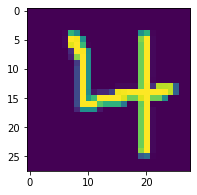

In [ ]:
test_img = Image.open("/content/drive/MyDrive/chetiri.png")
test_img = ImageOps.invert(test_img)
test_img = test_img.resize((28,28))
test_img = test_img.convert("L")
plt.figure(figsize = (3,3))
plt.imshow(test_img)


Predicted [4]


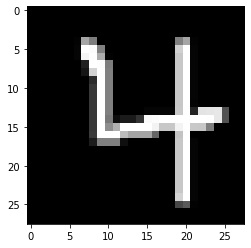

In [ ]:
test_img = np.array(test_img, np.float32) / 255.
test_img = test_img.reshape([-1,784])
pred = bestModel.predict(test_img)
img = np.reshape(test_img, [28, 28])
print("Predicted {0}".format(pred))
plt.imshow(img, cmap = 'gray')

Predicted [0]


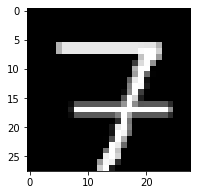

In [ ]:
test_img1 = Image.open("/content/drive/MyDrive/seven.png")
test_img1 = ImageOps.invert(test_img1)
test_img1 = test_img1.resize((28,28))
test_img1 = test_img1.convert("L")
plt.figure(figsize = (3,3))
plt.imshow(test_img1)

test_img1 = np.array(test_img1, np.float32) / 255.
test_img1 = test_img1.reshape([-1,784])
pred1 = bestModel.predict(test_img1)
img = np.reshape(test_img1, [28, 28])
print("Predicted {0}".format(pred1))
plt.imshow(img, cmap = 'gray')

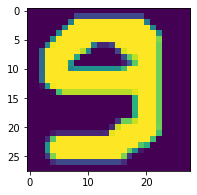

In [ ]:
test_img2 = Image.open("/content/drive/MyDrive/nine.png")
test_img2 = ImageOps.invert(test_img2)
test_img2 = test_img2.resize((28,28))
test_img2 = test_img2.convert("L")
plt.figure(figsize = (3,3))
plt.imshow(test_img2)


Predicted [1]


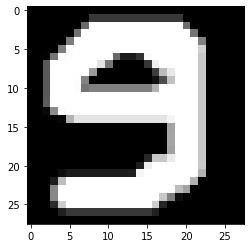

In [ ]:
test_img2 = np.array(test_img2, np.float32) / 255.
test_img2 = test_img2.reshape([-1,784])
pred2 = bestModel.predict(test_img2)
img = np.reshape(test_img2, [28, 28])
print("Predicted {0}".format(pred2))
plt.imshow(img, cmap = 'gray')

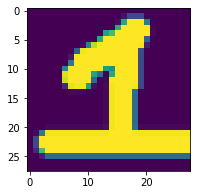

In [ ]:
test_img3 = Image.open("/content/drive/MyDrive/one.png")
test_img3 = ImageOps.invert(test_img3)
test_img3 = test_img3.resize((28,28))
test_img3 = test_img3.convert("L")
plt.figure(figsize = (3,3))
plt.imshow(test_img3)

Predicted [1]


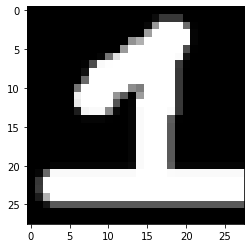

In [ ]:
test_img3 = np.array(test_img3, np.float32) / 255.
test_img3 = test_img3.reshape([-1,784])
pred3 = bestModel.predict(test_img3)
img = np.reshape(test_img3, [28, 28])
print("Predicted {0}".format(pred3))
plt.imshow(img, cmap = 'gray')